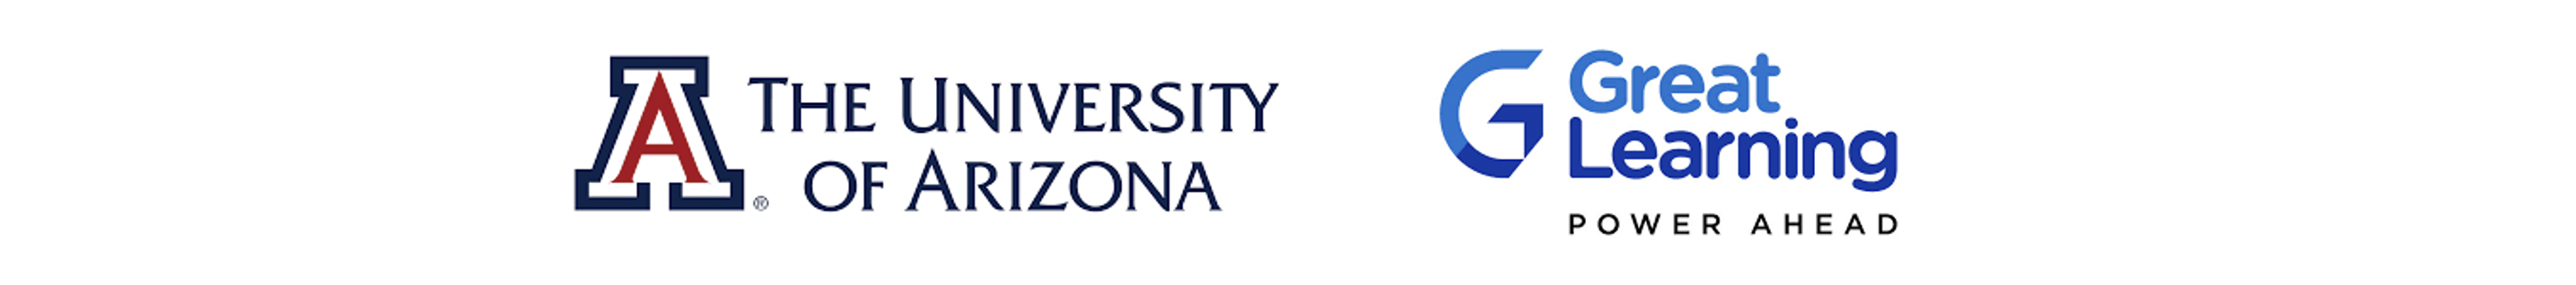

# **<font color='darkblue'>Introduction to NLP and Textual Data**

### **<font color='blue'>Learning Objectives**
- Understanding NLP
- Examples of Language data
- Textual Data
- Text Extraction and Clean-up
- Case Study

### <font color='red'>Pop Up Quiz:</red>

---



##### **Q1. ___________ is the process that converts sentences into understandable bits of data** *(words, subwords, etc*) **that a program can work with?**
  

Tokenization

##### **Q2. Which metric is used to evaluate agreement between 2 annotators?**

Cohen's Kappa

##### **Q3. Truncation and Padding is used to force the input sequence to have same number of tokens (True/False)**

True

### **<font color='blue'>What is NLP?**

- Natural Language Processing is a subfield of artificial intelligence that enables computers to comprehend, analyze, and modify human language. 

- NLP draws from many disciplines, including computer science and computational linguistics, in a way to bridge the gap between human communication and machine understanding.

It is used for
- Sentiment analysis
- Automatic summarization
- Speech recognition

### **<font color='blue'>Examples of Language Data**

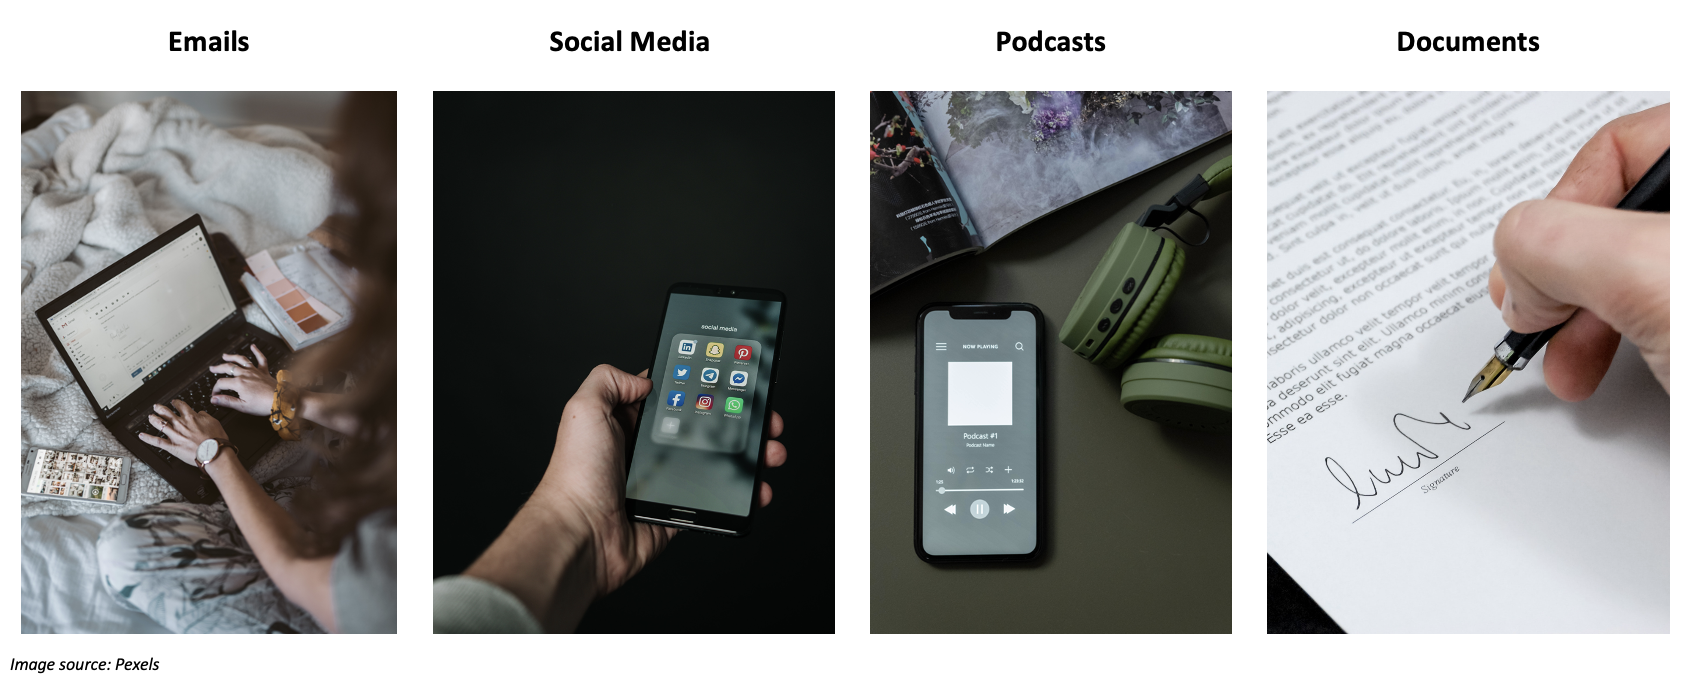

### **<font color='blue'>Some NLP Based Solutions**

- Text Summarization (Document summary)
- Language Translation
- Email reply suggestions
- Spam detection
- Autocorrection

### **<font color='blue'>Textual Data**

- **Structured Data**
 - It has features (columns)
 - All records have same features.

 

- **Textual Data**
  - Do not have features in tabular data
  - Examples usually have different size


### **<font color='blue'>Features in Textual Data**

- Words
- Characters
- Combination of words
- Sentences
- etc

## **<font color='darkblue'>Text Processing**

### **<font color='blue'>Tokenization using Spacy**

In [1]:
import spacy # https://spacy.io/usage/linguistic-features

ModuleNotFoundError: No module named 'spacy'

In [ ]:
nlp = spacy.load("en_core_web_sm")   #is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities

In [ ]:
sentences = [
  'Hi Michael Stone, We are glad you could join us. I hope you have watched every video from week 1 and are prepared to put what you have learned into practise.',
]

In [ ]:
for word in sentences:
    doc = nlp(word)
    for token in doc:
        print(token.text,)  # word tokens

Hi
Michael
Stone
,
We
are
glad
you
could
join
us
.
I
hope
you
have
watched
every
video
from
week
1
and
are
prepared
to
put
what
you
have
learned
into
practise
.


**Part of Speech tagging (POS tagging) is the technique of assigning labels (parts of speech) to words in a sentence based on their usage context and meaning**

In [ ]:
for token in doc:
  print (token, token.tag_, token.pos_, spacy.explain(token.tag_), token.is_stop) #tag_ lists POS code, pos__ lists POS in detail

Hi UH INTJ interjection False
Michael NNP PROPN noun, proper singular False
Stone NNP PROPN noun, proper singular False
, , PUNCT punctuation mark, comma False
We PRP PRON pronoun, personal True
are VBP AUX verb, non-3rd person singular present True
glad JJ ADJ adjective (English), other noun-modifier (Chinese) False
you PRP PRON pronoun, personal True
could MD AUX verb, modal auxiliary True
join VB VERB verb, base form False
us PRP PRON pronoun, personal True
. . PUNCT punctuation mark, sentence closer False
I PRP PRON pronoun, personal True
hope VBP VERB verb, non-3rd person singular present False
you PRP PRON pronoun, personal True
have VBP AUX verb, non-3rd person singular present True
watched VBN VERB verb, past participle False
every DT DET determiner True
video NN NOUN noun, singular or mass False
from IN ADP conjunction, subordinating or preposition True
week NN NOUN noun, singular or mass False
1 CD NUM cardinal number False
and CC CCONJ conjunction, coordinating True
are VBP 

Using POS tags, one can extract particular category of words for e.g. all . For example, you can build a resume parser to extract key words and check whether the resume matches with the key requirements 

**Rule based matching to extract relevant information from text.** 

Identify and extract tokens and phrases according to patterns. We can use regular expressions to extract entities.

In [ ]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern])
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

2
(3232560085755078826, 1, 2) Michael
(3232560085755078826, 2, 3) Stone


### **<font color='blue'>Handling HTML Text**

Python's Beautiful Soup package can extract data from HTML and XML files. It works with your preferred parser to offer idiomatic ways of navigating, searching, and modifying the parse tree. It helps programmers to save hours or even days of effort.

https://beautiful-soup-4.readthedocs.io/en/latest/

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [ ]:
strip_html_tags('<html><h2>Lets learn how to extract html data</h2></html>')

'Lets learn how to extract html data'

## **<font color='blue'>Normalization**

When text is normalised,
- We try to lessen its variability and bring it closer to a specified "standard". 
- By doing so, we can decrease the variety of data that the computer must process, which increases efficiency. 
- Lemmatization and stemming are examples of normalisation procedures that aim to reduce a word's inflectional forms and at times derivationally related forms to a basic form that is shared by all words.

### **<font color='blue'>Removing Special Characters**

Special characters typically don't improve the text in any way. They can be used, for example, to parse text when a specific special character appears or to indicate the requirement for word expansions. Once they have been used to process the text, they can be eliminated from the text to remove any extraneous data from the NLP algorithms.

In [ ]:
import re

In [ ]:
def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [ ]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

In [ ]:
remove_special_characters('Sómě Áccěntěd těxt')

'Sm ccntd txt'

### **<font color='blue'>Remove accented characters**





In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [ ]:
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

### **<font color='blue'>Text Lemmatization**


Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word `better` to its root word, or lemme, `good`. 

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])   

In [ ]:
lemmatize_text("My system keeps crashing, his crashed yesterday, ours crashes daily")

'My system keep crashing, his crashed yesterday, ours crash daily'

### **<font color='blue'>Text Stemming**

 In Stemming, the variant forms of a word are reduced to a standard form. It is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words `learning`,`learns`,`learnt` is `learn`



In [ ]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

## **<font color='darkblue'>Case Study**

### <font color='blue'>This case study demonstrates how to retrieve and analyse news articles from a website.

In [ ]:
import requests

#Let's download the data from inshorts website. In this case, news articles will be from 'technology' category
url = 'https://inshorts.com/en/read/technology'

In [ ]:
news_category = url.split('/')[-1]
news_category

'technology'

### **<font color='blue'>Download HTML Data**

In [ ]:
#Download the data from Website
data = requests.get(url)

In [ ]:
print(data.content)

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

### **<font color='blue'>Data Cleaning**

We can use Beautiful Soup package to clean Web data

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
    /* The Modal (background) */
    .modal_contact {
        display: none; /* Hidden by default */
        position: fixed; /* Stay in place */
        z-index: 8; /* Sit on top */
        left: 0;
        top: 0;
        width: 100%; /* Full width */
        height: 100%;
        overflow: auto; /* Enable scroll if needed */
        background-color: rgb(0,0,0); /* Fallback color */
        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */
    }

    /* Modal Content/Box */
    .modal-content {
        background-color: #fefefe;
        margin: 15% auto;
        padding: 20px !important;
        padding-top: 0 !important;
        /* border: 1px solid #888; */
        text-align: center;
        position: relative;
        border-radius: 6px;
    }

    /* The Close Button */
    .close {
      left: 90%;
      color: #aaa;
      float: right;
      font-size: 28px;
      font-weight: bold;
    /* positi

Read all the articles. For each article, we will read:
- Headline
- Article body
- Category

This is done by reading text between specific HTML tags. The tags depend on actual web page

In [ ]:
news_data = []

In [ ]:
all_news_headlines = soup.find_all('div', class_ = ['news-card-title news-right-box'])

In [ ]:
for i in range(len(all_news_headlines)):
    print(i+1, all_news_headlines[i].find('span', attrs={'itemprop': 'headline'}).string)

1 13-year-old 'runs' tech firm with paid employees in China, school starts probe
2 Why is Twitter's new CEO Linda nicknamed 'Velvet Hammer'?
3 Sea cut snacks & luxury tea, switched to cheaper toilet paper to turn profitable
4 Bengaluru Police warns of 'part-time job' scam on WhatsApp; shares chat
5 Upcoming iPhones to be made in India by Tata Group: Report
6 IBM employee on sick leave for 15 years sues company for no pay rise in UK
7 Influencer charges fans $1/min to chat with her AI version, could earn $5 mn a month
8 India's digital intervention like none other: Tata Sons Chairman
9 Flying car's wind tunnel tests completed by Brazil's Eve
10 AI chatbot ChatGPT fails to identify Japan minister pushing AI use
11 Regulation's role vital in digital lending: Amazon Pay India exec
12 Infosys allots over 5.11 lakh shares to employees as stock option
13 Apple supplier Foxconn to invest $500 mn in T'gana's Kongara Kalan
14 Nagpur man loses ₹6.16 lakh on clicking on link sent on WhatsApp
15 Ap

In [ ]:
all_news_body = soup.find_all('div', class_=['news-card-content news-right-box'])
len(all_news_body)

25

In [ ]:
for i in range(len(all_news_body)):
    print(i+1, all_news_body[i].find('div', attrs={'itemprop': 'articleBody'}).string)

1 A Chinese school is investigating claims made by a 13-year-old student who said he runs an internet technology company with 5 to 6 paid employees. According to a viral video, his classmates picked him when they were asked to write an assignment on a successful classmate. "He's definitely not the legal head of a company...it's impossible," the school's spokesperson said.
2 Linda Yaccarino, Twitter's new CEO who left her advertising job at NBCUniversal, is nicknamed the 'velvet hammer' in the advertising world. A report by WSJ said that Linda got the nickname for her "hard-nosed but fair" negotiating style. Advertising tycoon Sir Martin Sorrell described her as "very effective", adding: "She's probably just what clients need to establish trust and confidence."
3 Singapore-based Sea, which owns Garena Free Fire game, cut costs to report its first quarterly profit in its 14-year history. Sea banned business class flights for employees, removed snacks and replaced luxury tea brand with ch

In [ ]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [ ]:
#Check news data
news_data.extend(news_articles)
news_data

[{'news_headline': "13-year-old 'runs' tech firm with paid employees in China, school starts probe",
  'news_article': 'A Chinese school is investigating claims made by a 13-year-old student who said he runs an internet technology company with 5 to 6 paid employees. According to a viral video, his classmates picked him when they were asked to write an assignment on a successful classmate. "He\'s definitely not the legal head of a company...it\'s impossible," the school\'s spokesperson said.',
  'news_category': 'technology'},
 {'news_headline': "Why is Twitter's new CEO Linda nicknamed 'Velvet Hammer'?",
  'news_article': 'Linda Yaccarino, Twitter\'s new CEO who left her advertising job at NBCUniversal, is nicknamed the \'velvet hammer\' in the advertising world. A report by WSJ said that Linda got the nickname for her "hard-nosed but fair" negotiating style. Advertising tycoon Sir Martin Sorrell described her as "very effective", adding: "She\'s probably just what clients need to esta

**Read the news data in a Dataframe**

In [ ]:
import pandas as pd

#Building dataframe
df = pd.DataFrame(news_data, columns=['news_headline', 'news_article', 'news_category'])

In [ ]:
df.head()

news_headline  \
0  13-year-old 'runs' tech firm with paid employe...   
1  Why is Twitter's new CEO Linda nicknamed 'Velv...   
2  Sea cut snacks & luxury tea, switched to cheap...   
3  Bengaluru Police warns of 'part-time job' scam...   
4  Upcoming iPhones to be made in India by Tata G...   

                                        news_article news_category  
0  A Chinese school is investigating claims made ...    technology  
1  Linda Yaccarino, Twitter's new CEO who left he...    technology  
2  Singapore-based Sea, which owns Garena Free Fi...    technology  
3  Bengaluru Police has warned citizens against p...    technology  
4  Tata Group has entered into a contract with Ap...    technology

### **Word Cloud**

**Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.**

- The larger the word in the visual the more common the word was in the document(s). This type of visualization can assist evaluators with exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. It can also be used for communicating the most salient points or themes in the reporting stage.

In [ ]:
import matplotlib.pyplot as plt # visualization
from wordcloud import WordCloud

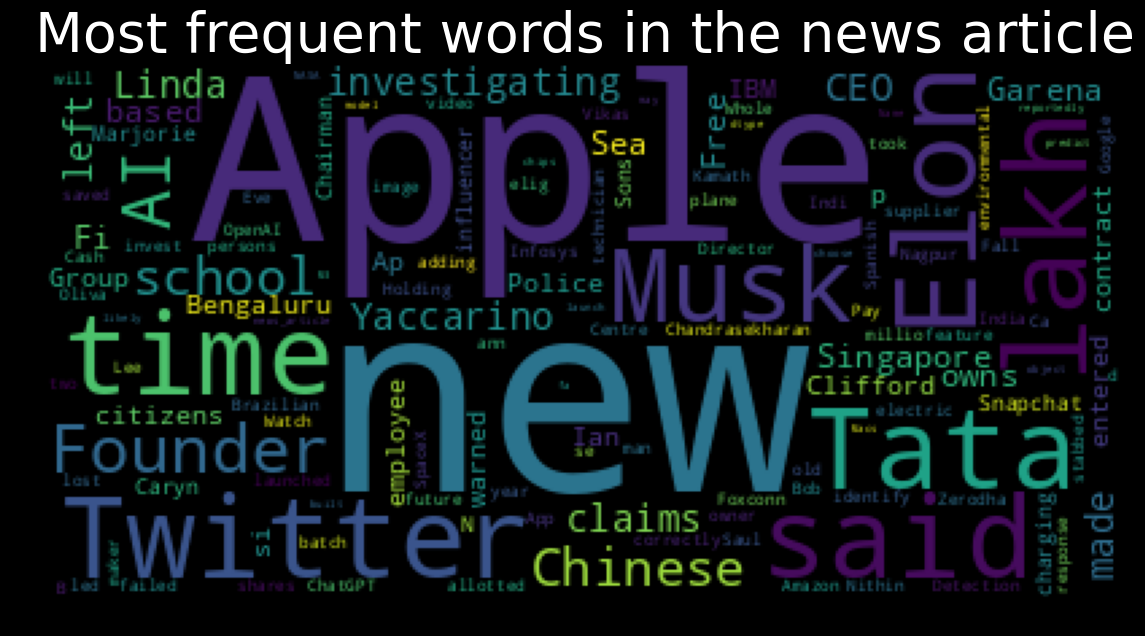

In [ ]:
# Define wordcloud function from wordcloud library.
wc = WordCloud()
wc.generate(str(df['news_article']))
# declare our figure 
plt.figure(figsize=(15,7), facecolor='k')
# add title to the graph
plt.title("Most frequent words in the news article", fontsize=40, color='white')
plt.imshow(wc)
plt.show()

### **Extract more Web data**

Function to extract data from inshorts.com. The function will:

1. Take a URLs list as input
2. Get content for each URL
3. Extract news article headline, body and category

In [ ]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world', 
             'https://inshorts.com/en/read/business']

In [ ]:
def datasetPrepare(urls_list):
    
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [ ]:
#Build the dataframe
news_df = datasetPrepare(urls_list)

In [ ]:
news_df.sample(n=10)

news_headline  \
30  What are the 3 new rules of cricket announced ...   
55  China to promote ‘new-era’ marriage & childbea...   
94              Vice Media files for bankruptcy in US   
17  AI may control humanity, say 'bye, you're bori...   
70  Zelenskyy makes surprise visit to Paris for ta...   
19  Biden tried to demand we fire all unvaccinated...   
32  'Godfather of Poker' Doyle Brunson passes away...   
38  Sanju Samson has had a below-par IPL 2023 so f...   
41  RR players got carried away with the batting p...   
89  KKR-backed Envision Healthcare files for bankr...   

                                         news_article news_category  
30  ICC announced three new rules that'll come int...        sports  
55  China will launch a pilot project to promote a...         world  
94  Vice Media Group, the company behind Vice and ...      business  
17  There could be a time in future when AI could ...    technology  
70  Ukrainian President Volodymyr Zelenskyy made a...         world  
19  Twitter owner Elon Musk in response to a video...    technology  
32  Doyle Brunson, who was also known as the 'Godf...        sports  
38  Ex-India wicketkeeper-batter Deep Dasgupta sai...        sports  
41  Rajasthan Royals head coach Kumar Sangakkara s...        sports  
89  KKR-backed Envision Healthcare and its wholly-...      business

In [ ]:
#Articles count by category
news_df.news_category.value_counts()

technology    25
sports        25
world         25
business      25
Name: news_category, dtype: int64

### **<font color='blue'>Text Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer

**Remove HTML tags**

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

**Remove accented characters**

In [ ]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

**Remove special characters**

In [ ]:
def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

**Lemmatization**

In [ ]:
def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()]) 

**Stemming**

In [ ]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

### **<font color='blue'>Building a text normalizer**

In [ ]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

### **<font color='blue'>Pre-process and normalize news articles**

In [ ]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [ ]:
news_df.head()

news_headline  \
0  13-year-old 'runs' tech firm with paid employe...   
1  Why is Twitter's new CEO Linda nicknamed 'Velv...   
2  Sea cut snacks & luxury tea, switched to cheap...   
3  Bengaluru Police warns of 'part-time job' scam...   
4  Upcoming iPhones to be made in India by Tata G...   

                                        news_article news_category  \
0  A Chinese school is investigating claims made ...    technology   
1  Linda Yaccarino, Twitter's new CEO who left he...    technology   
2  Singapore-based Sea, which owns Garena Free Fi...    technology   
3  Bengaluru Police has warned citizens against p...    technology   
4  Tata Group has entered into a contract with Ap...    technology   

                                           full_text  
0  13-year-old 'runs' tech firm with paid employe...  
1  Why is Twitter's new CEO Linda nicknamed 'Velv...  
2  Sea cut snacks & luxury tea, switched to cheap...  
3  Bengaluru Police warns of 'part-time job' scam...  
4  Upcoming iPhones to be made in India by Tata G...

In [ ]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

In [ ]:
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'Why is Twitter\'s new CEO Linda nicknamed \'Velvet Hammer\'?. Linda Yaccarino, Twitter\'s new CEO who left her advertising job at NBCUniversal, is nicknamed the \'velvet hammer\' in the advertising world. A report by WSJ said that Linda got the nickname for her "hard-nosed but fair" negotiating style. Advertising tycoon Sir Martin Sorrell described her as "very effective", adding: "She\'s probably just what clients need to establish trust and confidence."',
 'clean_text': 'why is twitters new ceo linda nicknamed velvet hammer linda yaccarino twitters new ceo who left her advertising job at nbcuniversal is nicknamed the velvet hammer in the advertising world a report by wsj said that linda got the nickname for her hardnosed but fair negotiating style advertising tycoon sir martin sorrell described her a very effective adding shes probably just what client need to establish trust and confidence '}

### **<font color='blue'>Save the news articles**

In [ ]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')